# VBSR analysis on HM 27 Figueroa methylation probes

In [1]:
library(vbsr)
library(dplyr)
source('../R/regressionModel/regressionModel.R')


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-13

Loading required package: grid
ComplexHeatmap version 1.17.1
Bioconductor page: http://bioconductor.org/packages/ComplexHeatmap/
Github page: https://github.com/jokergoo/ComplexHeatmap
Documentation: http://bioconductor.org/packages/ComplexHeatmap/

If you use it in published research, please cite:
Gu, Z. Complex heatmaps reveal patterns and correlations in multidimensional 
  genomic data. Bioinformatics 2016.

Loading required package: viridisLite


In [2]:
Figueroa.HM27 <- read.csv('/oak/stanford/groups/andrewg/users/szmamie/repos/MethylationPrediction/data/LAML/processed/Figueroa-HM27-imputed-M.tsv',
                          stringsAsFactor=F, sep='\t', header=F)

In [3]:
head(Figueroa.HM27)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172
TCGA.AB.2803.03,TCGA.AB.2805.03,TCGA.AB.2806.03,TCGA.AB.2807.03,TCGA.AB.2808.03,TCGA.AB.2810.03,TCGA.AB.2811.03,TCGA.AB.2812.03,TCGA.AB.2813.03,TCGA.AB.2814.03,⋯,TCGA.AB.3002.03,TCGA.AB.3005.03,TCGA.AB.3006.03,TCGA.AB.3007.03,TCGA.AB.3008.03,TCGA.AB.3009.03,TCGA.AB.3011.03,TCGA.AB.3012.03,cluster,NA
PHF13,0.342376841331799,3.89910990638938,-0.325894750548895,2.1324051221441,0.604472915779244,4.27645233912584,0.093982236583543,1.60238123283841,-2.45781768914949,⋯,-0.201732689805535,2.94982830365201,-4.42311450565101,0.705369300814628,1.84476939112185,2.15034737355097,-4.59156551295046,4.08057608543529,1.00697327270491,1
PHF13,-5.22598597418404,-5.11684373013096,-5.59435575996802,-4.17937111441898,-4.72164634816468,-4.91395229877669,-5.67461066104599,-5.26879334031999,-5.28560771811977,⋯,-5.42118276581357,-3.36367432508735,-4.94310390834695,-5.2486713326837,-5.32255570040772,-4.89702470896927,-4.66422658600223,-4.57026667855023,-5.18286174945182,2
HNRNPR,-5.98477094559978,-6.14078503056123,-6.14538887332879,-5.68016085539579,-6.01316195106498,-6.09873142274823,-5.98669727102667,-6.11167512049861,-5.52516418820383,⋯,-6.30276225949751,-5.68040714873043,-5.84716625780783,-5.93650679036303,-5.59487458900063,-5.94130798538348,-5.68344161879283,-6.04817487186585,-5.9765394215296,3
HNRNPR,-6.31151840380188,-6.69978520594554,-6.5491665758449,-6.24093411211342,-6.45301991137715,-6.41814191252889,-6.3492665374453,-6.74797548961094,-6.35505423087002,⋯,-6.52070266277027,-6.06375826608988,-6.54373711390798,-6.45268151940333,-6.53240163016061,-6.27158568589436,-6.26292949236407,-6.53161732738339,-6.64201546279755,3
THEM4,-6.36827289879088,-4.36827827171716,2.41865353299124,-1.14802693769955,-3.68997510054073,-4.17801001140916,-6.13787492336051,-2.60659130641118,-5.8448660027715,⋯,-5.99879639417634,-1.90991578946699,-6.35759738995619,-6.15121053439478,-5.42941792108019,-5.89069422606636,2.65178681945372,-4.85115230972334,-6.21498491274878,2


In [4]:
HM27 <- data.matrix(Figueroa.HM27[-1,-1])

rownames(HM27) <- Figueroa.HM27[-1,1]
colnames(HM27) <- Figueroa.HM27[1,-dim(Figueroa.HM27)[2]]

In [5]:
head(HM27)

,TCGA.AB.2803.03,TCGA.AB.2805.03,TCGA.AB.2806.03,TCGA.AB.2807.03,TCGA.AB.2808.03,TCGA.AB.2810.03,TCGA.AB.2811.03,TCGA.AB.2812.03,TCGA.AB.2813.03,TCGA.AB.2814.03,⋯,TCGA.AB.3001.03,TCGA.AB.3002.03,TCGA.AB.3005.03,TCGA.AB.3006.03,TCGA.AB.3007.03,TCGA.AB.3008.03,TCGA.AB.3009.03,TCGA.AB.3011.03,TCGA.AB.3012.03,cluster
PHF13,0.3423768,3.899110,-0.3258948,2.132405,0.6044729,4.276452,0.09398224,1.602381,-2.457818,-1.091170,⋯,-0.2017327,2.949828,-4.423115,0.7053693,1.844769,2.150347,-4.591566,4.080576,1.006973,1
PHF13,-5.2259860,-5.116844,-5.5943558,-4.179371,-4.7216463,-4.913952,-5.67461066,-5.268793,-5.285608,-5.253347,⋯,-5.4211828,-3.363674,-4.943104,-5.2486713,-5.322556,-4.897025,-4.664227,-4.570267,-5.182862,2
HNRNPR,-5.9847709,-6.140785,-6.1453889,-5.680161,-6.0131620,-6.098731,-5.98669727,-6.111675,-5.525164,-5.862543,⋯,-6.3027623,-5.680407,-5.847166,-5.9365068,-5.594875,-5.941308,-5.683442,-6.048175,-5.976539,3
HNRNPR,-6.3115184,-6.699785,-6.5491666,-6.240934,-6.4530199,-6.418142,-6.34926654,-6.747975,-6.355054,-6.933813,⋯,-6.5207027,-6.063758,-6.543737,-6.4526815,-6.532402,-6.271586,-6.262929,-6.531617,-6.642015,3
THEM4,-6.3682729,-4.368278,2.4186535,-1.148027,-3.6899751,-4.178010,-6.13787492,-2.606591,-5.844866,-1.927395,⋯,-5.9987964,-1.909916,-6.357597,-6.1512105,-5.429418,-5.890694,2.651787,-4.851152,-6.214985,2
THEM4,-5.2171690,-4.240914,2.5841896,-3.553892,-4.6451805,-4.960789,-4.37749236,-3.616209,-4.026943,-3.625518,⋯,-4.2415622,-2.342572,-5.486683,-4.2190998,-4.611432,-5.189960,2.841078,-3.840631,-4.191026,2


In [6]:
table(HM27[,dim(HM27)[2]]) # number of probes in each cluster


  1   2   3   4   5   6   7 
230 407 345 257 187  13  31 

## Compute the average of methylation level within each cluster

In [7]:
findClusterIdx <- function(i) {
    n <- dim(HM27)[2]
    which(HM27[,n] == i)
}

In [8]:
computeAverage <- function(idx) {
    n <- dim(HM27)[2]
    cluster.probes <- HM27[idx, -n]
    cbind(apply(cluster.probes, 2, mean), apply(cluster.probes, 2, sd))
}

In [9]:
cluster1.mean <- computeAverage(findClusterIdx(1)) # cluster 1 mean and sd (?weighted average be used since there are duplicate probes for genes)

In [10]:
length(names(findClusterIdx(1)))

[1] 230

In [11]:
length(unique(names(findClusterIdx(1))))

[1] 178

## Input for VBSR functions

In [12]:
# load the RNAseq data
rnaseq.raw <- read.csv('../data/LAML/processed/rnaseq-imputed-matched-filtered.tsv', sep='\t', stringsAsFactor=F, header=F)

In [13]:
rnaseq <- data.matrix(rnaseq.raw[-1, -1])
colnames(rnaseq) <- rnaseq.raw[1, -dim(rnaseq.raw)[2]]
rownames(rnaseq) <- rnaseq.raw[-1, 1]

In [14]:
head(rnaseq)  # predictors

,TCGA.AB.2803.03,TCGA.AB.2805.03,TCGA.AB.2806.03,TCGA.AB.2807.03,TCGA.AB.2808.03,TCGA.AB.2810.03,TCGA.AB.2811.03,TCGA.AB.2812.03,TCGA.AB.2813.03,TCGA.AB.2814.03,⋯,TCGA.AB.3000.03,TCGA.AB.3001.03,TCGA.AB.3002.03,TCGA.AB.3005.03,TCGA.AB.3006.03,TCGA.AB.3007.03,TCGA.AB.3008.03,TCGA.AB.3009.03,TCGA.AB.3011.03,TCGA.AB.3012.03
AATF,10.368524,9.693450,10.0565386,10.0397849,10.274735,10.932163,10.986857,10.476752,9.7570999,10.1548433,⋯,10.2289912,10.205735,10.178091,10.414781,10.300935,10.1251551,10.524686,10.525305,10.001256,10.068183
ABCA2,11.656601,9.593247,9.2031852,12.9087996,10.053714,12.552022,12.939887,10.832508,10.5325611,12.5099656,⋯,11.8862717,12.934884,13.760145,10.960962,12.710665,12.0081485,12.230289,12.960230,13.251347,11.795229
ABCG1,7.052198,8.114307,9.2552073,10.2366769,7.821692,6.700669,8.880732,9.094156,8.9388671,9.3404336,⋯,8.8199775,8.704398,9.591324,5.696653,8.067137,9.0290111,9.720490,8.447106,6.283961,7.935925
ABHD14B,10.732715,10.142773,9.7922964,10.6729309,9.716510,11.747274,11.425847,10.349850,9.3568870,10.9476188,⋯,10.4284113,10.303563,10.771046,11.664395,10.946642,10.6496155,10.580834,10.516427,10.293944,10.274217
ABL1,10.489088,10.132487,10.9224372,11.4328798,10.824195,11.402512,11.458306,10.781015,10.3524108,10.4153620,⋯,11.7244233,11.434926,11.335134,10.918559,11.240256,11.5176694,11.988891,11.214398,11.446631,11.456861
ABLIM2,1.040963,1.420833,0.7791429,0.9899383,0.651775,2.718811,1.097746,1.148001,-0.2995603,0.6680283,⋯,-0.4791503,3.251537,2.756618,2.081859,1.611833,0.6780719,2.250568,4.176578,1.114034,1.214001


In [15]:
# select 75 % / 25 % split
set.seed(1)
train.idx <- sample(colnames(rnaseq), round(dim(rnaseq)[2] * 0.75, 0))

In [16]:
rnaseq.train <- rnaseq[, colnames(rnaseq) %in% train.idx]
head(rnaseq.train)

,TCGA.AB.2803.03,TCGA.AB.2805.03,TCGA.AB.2806.03,TCGA.AB.2808.03,TCGA.AB.2810.03,TCGA.AB.2813.03,TCGA.AB.2814.03,TCGA.AB.2815.03,TCGA.AB.2816.03,TCGA.AB.2818.03,⋯,TCGA.AB.2993.03,TCGA.AB.2996.03,TCGA.AB.2998.03,TCGA.AB.2999.03,TCGA.AB.3001.03,TCGA.AB.3002.03,TCGA.AB.3007.03,TCGA.AB.3008.03,TCGA.AB.3009.03,TCGA.AB.3012.03
AATF,10.368524,9.693450,10.0565386,10.274735,10.932163,9.7570999,10.1548433,10.068160,9.492238,9.9842216,⋯,9.9355045,10.079231,9.8745792,9.789039,10.205735,10.178091,10.1251551,10.524686,10.525305,10.068183
ABCA2,11.656601,9.593247,9.2031852,10.053714,12.552022,10.5325611,12.5099656,9.264434,9.936355,10.5718014,⋯,12.4328209,11.988173,11.0678723,11.012978,12.934884,13.760145,12.0081485,12.230289,12.960230,11.795229
ABCG1,7.052198,8.114307,9.2552073,7.821692,6.700669,8.9388671,9.3404336,7.011848,5.072698,6.2265239,⋯,8.6621478,8.131070,7.4487465,6.978975,8.704398,9.591324,9.0290111,9.720490,8.447106,7.935925
ABHD14B,10.732715,10.142773,9.7922964,9.716510,11.747274,9.3568870,10.9476188,9.641774,10.090621,9.9187638,⋯,10.2794589,10.735700,9.9199508,10.354015,10.303563,10.771046,10.6496155,10.580834,10.516427,10.274217
ABL1,10.489088,10.132487,10.9224372,10.824195,11.402512,10.3524108,10.4153620,10.910116,10.657662,10.0618103,⋯,11.2826543,10.997222,11.2157374,11.110426,11.434926,11.335134,11.5176694,11.988891,11.214398,11.456861
ABLIM2,1.040963,1.420833,0.7791429,0.651775,2.718811,-0.2995603,0.6680283,1.849959,2.943415,0.6566337,⋯,0.8775087,2.306641,0.5845777,2.538414,3.251537,2.756618,0.6780719,2.250568,4.176578,1.214001


In [17]:
cluster1.train <- cluster1.mean[,1][colnames(HM27) %in% train.idx]
head(cluster1.train)

TCGA.AB.2803.03 TCGA.AB.2805.03 TCGA.AB.2806.03 TCGA.AB.2808.03 TCGA.AB.2810.03 
     0.46062582      1.20791229      0.80805542      0.95612761      1.57453008 
TCGA.AB.2813.03 
    -0.02111069

## Train on vbsr and plot the heatmap

In [18]:
findIdx <- function(gene) {
    which(rownames(rnaseq) %in% gene)
}
FindIdx <- Vectorize(findIdx)

In [28]:
n <- dim(HM27)[2]
plotCluster <- function(i) {
    set.seed(1)
    idx <- findClusterIdx(i)
    cluster.probes <- HM27[idx, -n]
    cluster.mean <- computeAverage(findClusterIdx(i))
    model.fit <- vbsr(y=cluster.mean, X=t(rnaseq), family='normal', eps=5e-15, maxit=10^4, post=0.5) 
    post <- model.fit$post
    significant.idx <- post > 0.3
    coef.names <- rownames(rnaseq.train)[significant.idx]
    coef.significant <- model.fit$beta[significant.idx]
    res1 <- data.frame(gene=coef.names, coef=coef.significant)
    print(res1)
    ModuleHeatmap(t(cluster.probes), cluster.mean[,1], t(rnaseq[as.numeric(FindIdx(res1$gene)), ] * as.vector(sign(res1$coef))), center=T, scale=T)
}

     gene        coef
1    AKT1 -0.22615892
2   FOXD2  0.05541526
3   HYAL2 -0.11927905
4  IMPACT -0.15519935
5    MTO1 -0.17675724
6   PLAG1 -0.04210804
7     RB1  0.15982412
8   TGIF2  0.22782662
9  ZBTB38 -0.13531435
10 ZNF497  0.14516367


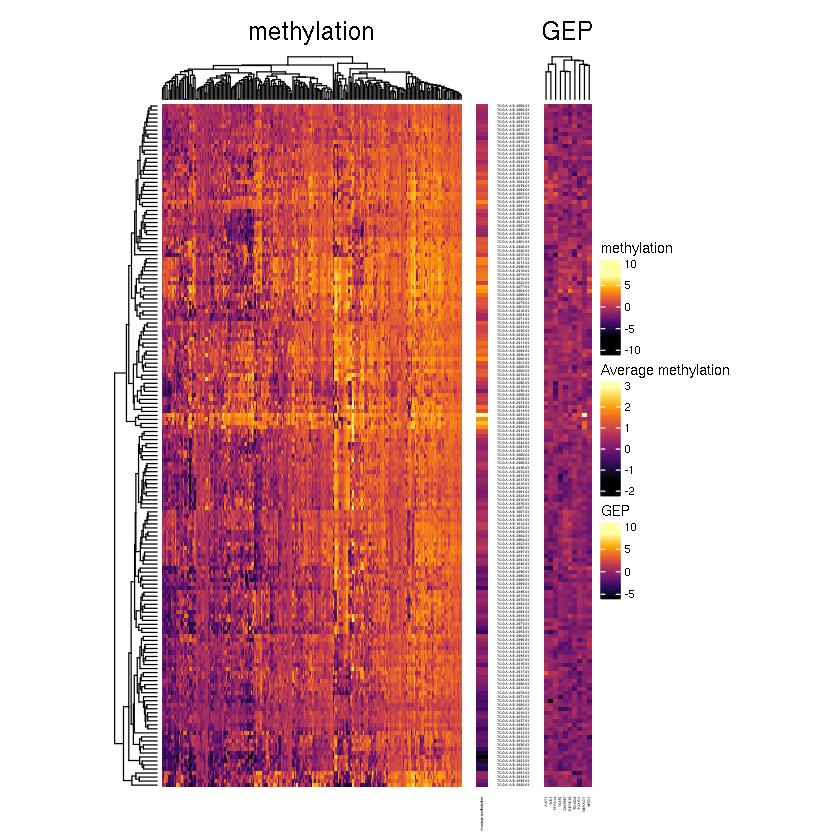

In [29]:
plotCluster(1)

    gene        coef
1   CBX1 -0.22758068
2  FADS1 -0.05723740
3   GLO1  0.34589892
4  HMGA1 -0.05696385
5 IMPACT -0.20361628
6  KLF11 -0.10786709


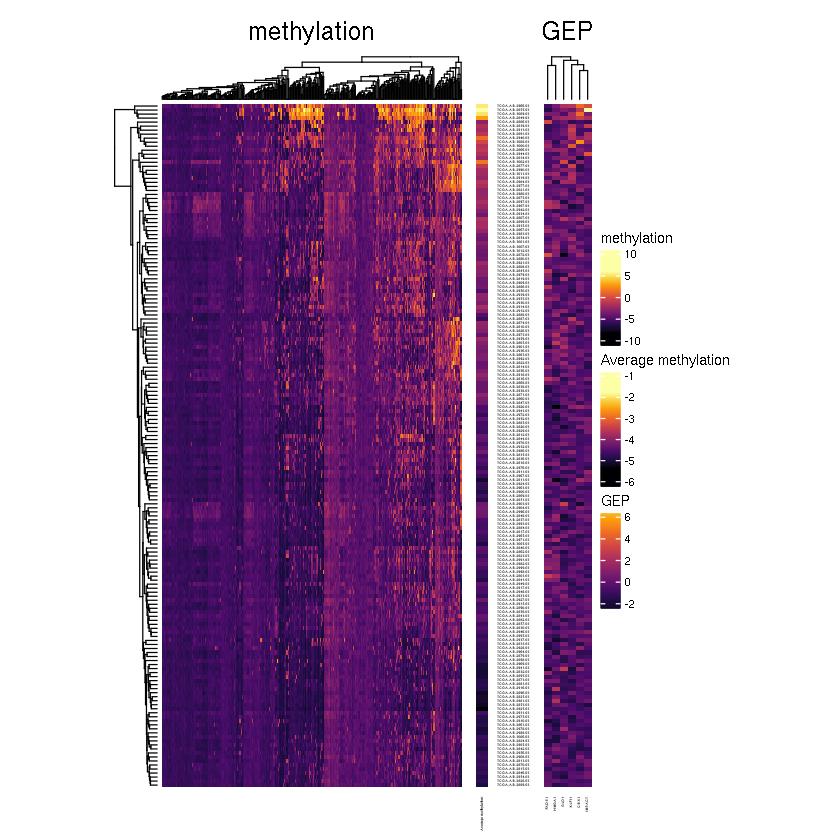

In [30]:
plotCluster(2)

Maximum iterations exceeded!
  gene       coef
1 CBX1 -0.1574084
2 GLO1  0.1039983


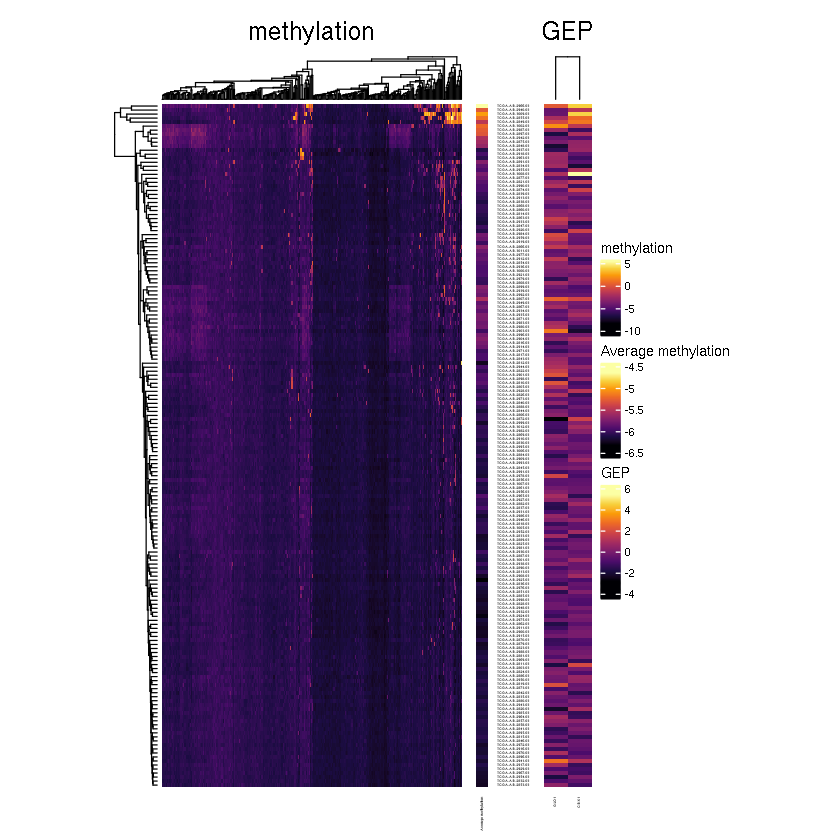

In [31]:
plotCluster(3) 

Maximum iterations exceeded!
Maximum iterations exceeded!
     gene        coef
1   APBB1 -0.04195096
2 GATAD2B  0.36660843
3    NFIA -0.07948942
4     UCN  0.04482611


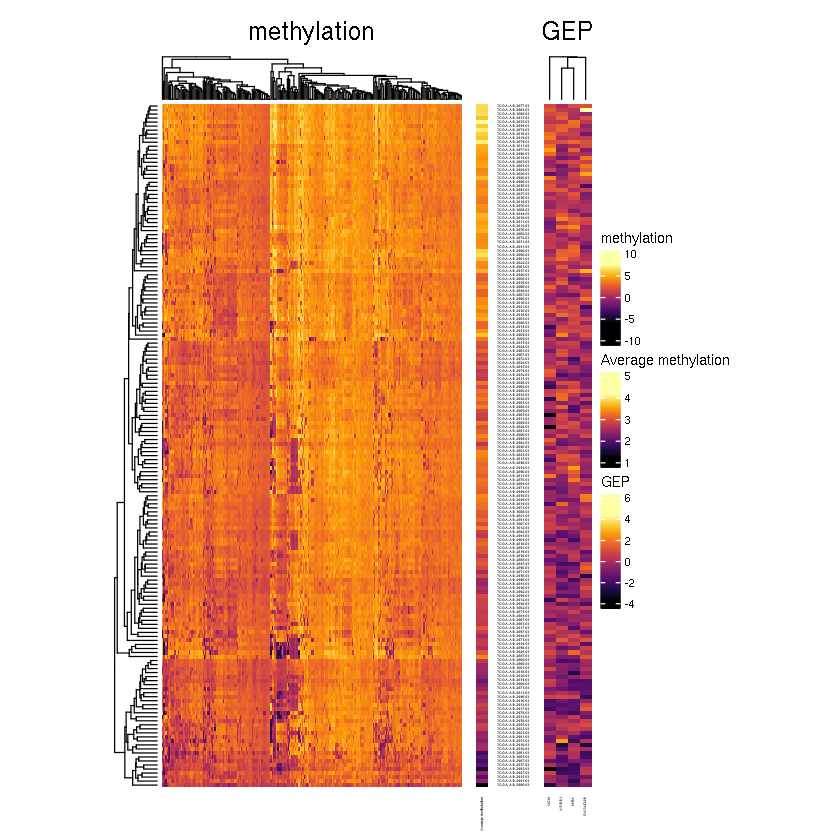

In [32]:
plotCluster(4)

      gene        coef
1 GTF2IRD1  0.09826179
2   IMPACT -0.48010626
3    KLF11 -0.25872069
4    NCOA7  0.20335699
5   ZNF205 -0.16172728


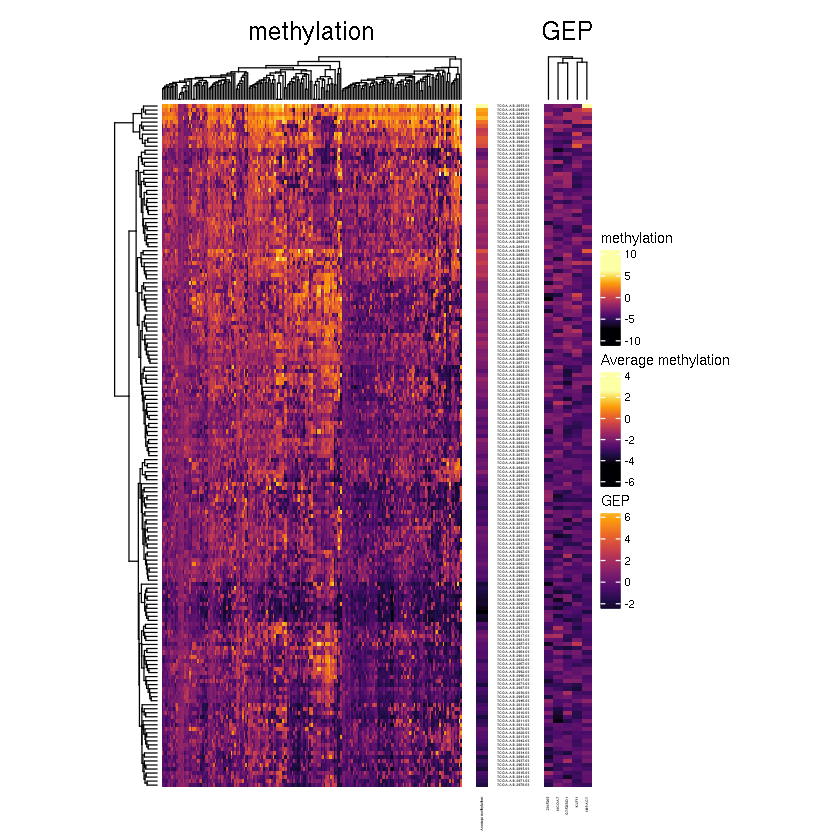

In [33]:
plotCluster(5)

    gene       coef
1  BOLA1 -0.4374240
2  FOXD2  0.3564093
3  SSBP3  0.3772453
4  ZNF14  0.2900583
5 ZNF595 -0.2064098


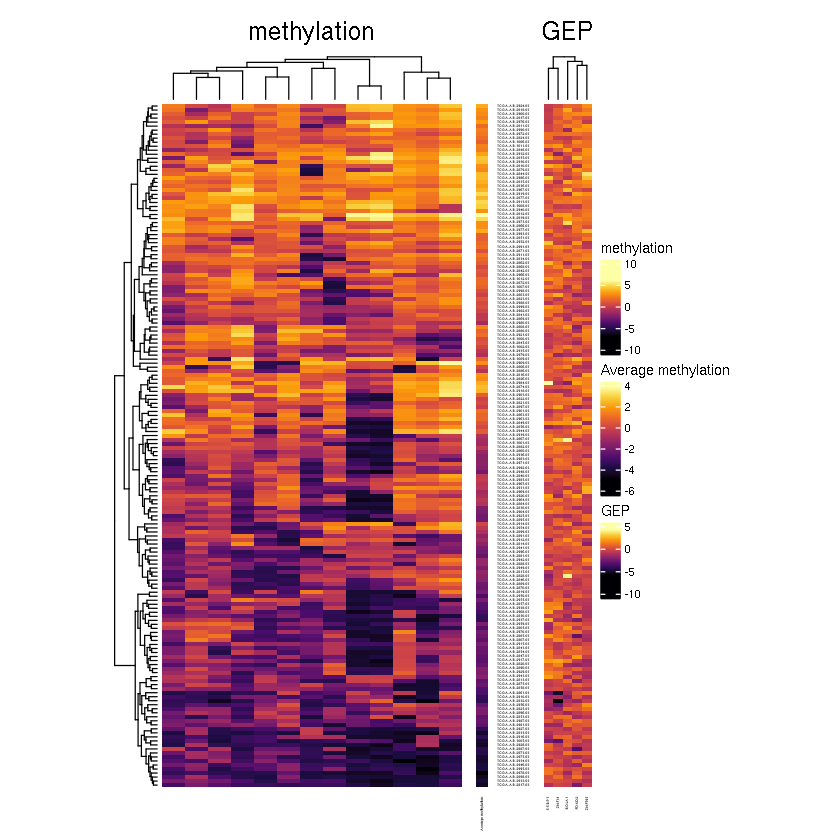

In [34]:
plotCluster(6)

   gene        coef
1  ALAD -0.23193612
2 CAMK4 -0.05240274
3  HES6 -0.03094693
4  NFIA -0.03278660


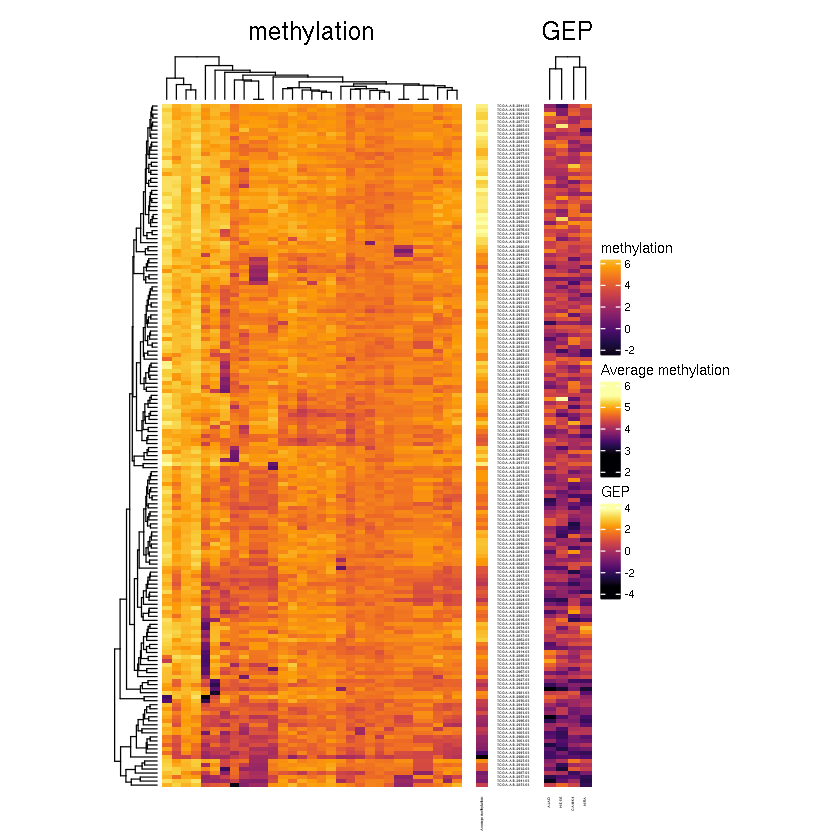

In [35]:
plotCluster(7)